# Importing the LIbraries


In [1]:
import pandas as pd #data processing, I/O operation
import numpy as np #linear algebra
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


loading the dataset


In [3]:
data = pd.read_csv(r"C:\Users\mypc\Desktop\data science1\mailege prediction\auto-mpg.csv")
data.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
data.tail(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
388,26.0,4,156.0,92,2585,14.5,82,1,chrysler lebaron medallion
389,22.0,6,232.0,112,2835,14.7,82,1,ford granada l
390,32.0,4,144.0,96,2665,13.9,82,3,toyota celica gt
391,36.0,4,135.0,84,2370,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
data.drop(['car name'], axis=1, inplace=True)
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
# Summary of the Dataset
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Data Preprocessing


In [7]:
data.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [8]:
data['horsepower'].unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
data = data[data.horsepower != '?']


In [10]:
'?' in data


False

In [11]:
data.shape


(392, 8)

# Correlation matrix


In [12]:
data.corr()['mpg'].sort_values()


weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

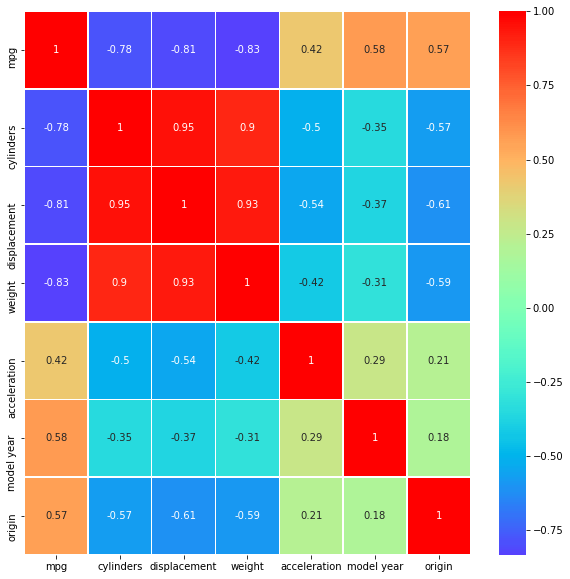

In [13]:
#Plotting the heatmap of the correlation

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, center=0, cmap='rainbow')
plt.show()


# Univariate Analysis


C:\Users\mypc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


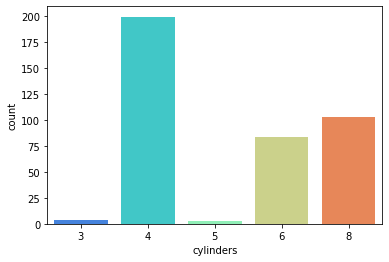

In [14]:
sns.countplot(data.cylinders, data=data, palette='rainbow')
plt.show()

C:\Users\mypc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


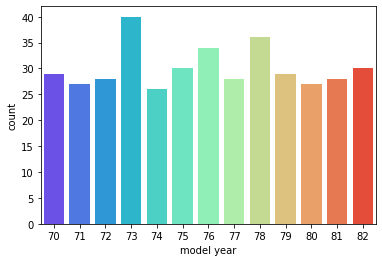

In [15]:
sns.countplot(data['model year'], palette='rainbow')
plt.show()

C:\Users\mypc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


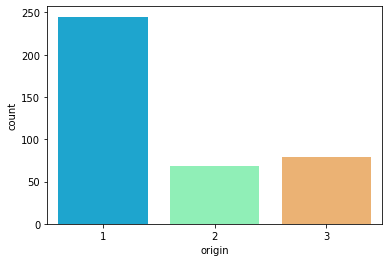

In [16]:
sns.countplot(data.origin, palette='rainbow')
plt.show()


# Multi-variate Analysis


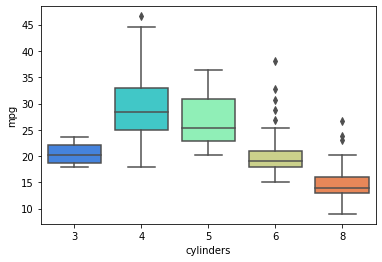

In [17]:
sns.boxplot(y='mpg', x='cylinders', data=data, palette='rainbow')
plt.show()

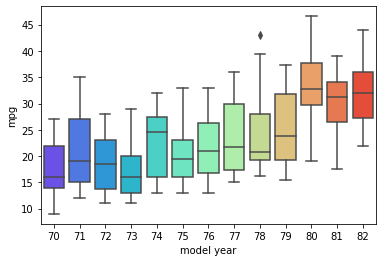

In [18]:
sns.boxplot(y='mpg', x='model year', data=data, palette='rainbow')
plt.show()


In [19]:
# Modelling my dataset

X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

# Train and test data split


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

# Build the model


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = regression.predict(x_test)


In [23]:
print(regression.score(x_test, y_test))


0.8191428142279116


# polynomial regression


In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.3, random_state=0)

lin_regression = LinearRegression()
lin_regression.fit(x_train,y_train)

print(lin_regression.score(x_test, y_test))

0.8342085925470633


# Conclusion

Accuracy score improves in the case of polynomial regression compared to the linear regression because it fits data much better. In this project, what we learned:

Loading the dataset
Univariate analysis
multivariate analysis
Linear regression
Polynomial Regression